# **Dataset**

In [93]:
# Step 1: Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [94]:
# Step 2: Load the Dataset
dataset = pd.read_csv('MalwareDataset.csv')

In [95]:
# Step 3: Display the First Few Rows
print("First 5 Rows of the Dataset:")
dataset.head()

First 5 Rows of the Dataset:


,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
0,10407,9,6,6,33088,262144,4,952,1
1,5354,9,6,6,33088,262144,4,952,1
2,58807,9,6,6,33088,262144,4,136490,1
3,25166,9,6,6,33088,262144,4,1940,1
4,70387,9,6,6,33088,262144,4,83098,1


In [96]:
# Step 4: Understand the Columns and Identify the Target
print("\nDataset Information:")
dataset.info()  # Gives an overview of columns and data types
print("\nUnique values in the 'legitimate' column:")
dataset['legitimate'].value_counts()  # Confirm the target column distribution

dataset_cleaned = dataset.dropna()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137444 entries, 0 to 137443
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   AddressOfEntryPoint          137444 non-null  int64
 1   MajorLinkerVersion           137444 non-null  int64
 2   MajorImageVersion            137444 non-null  int64
 3   MajorOperatingSystemVersion  137444 non-null  int64
 4   DllCharacteristics           137444 non-null  int64
 5   SizeOfStackReserve           137444 non-null  int64
 6   NumberOfSections             137444 non-null  int64
 7   ResourceSize                 137444 non-null  int64
 8   legitimate                   137444 non-null  int64
dtypes: int64(9)
memory usage: 9.4 MB

Unique values in the 'legitimate' column:


In [97]:
# Step 5: Descriptive Statistics
print("\nDescriptive Statistics:")
dataset.describe()


Descriptive Statistics:


,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
count,1.374440e+05,137444.000000,137444.000000,137444.000000,137444.000000,1.374440e+05,137444.000000,1.374440e+05,137444.000000
mean,1.722186e+05,8.620784,68.731876,5.098738,22301.043436,9.306841e+05,4.997119,2.474766e+05,0.297707
std,3.438014e+06,4.095635,1185.709873,99.437584,15444.753219,5.553175e+05,1.917237,2.129516e+07,0.457252
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,1.272100e+04,8.000000,0.000000,4.000000,320.000000,1.048576e+06,4.000000,2.216000e+03,0.000000
50%,5.300800e+04,9.000000,0.000000,5.000000,33088.000000,1.048576e+06,5.000000,9.640000e+03,0.000000
75%,6.157800e+04,10.000000,6.000000,5.000000,33088.000000,1.048576e+06,5.000000,2.376250e+04,1.000000
max,1.074484e+09,255.000000,28619.000000,36868.000000,49504.000000,3.355443e+07,40.000000,4.294903e+09,1.000000


In [98]:
# Step 6: Check for Missing Values
print("\nMissing Values in Each Column:")
dataset.isnull().sum()


Missing Values in Each Column:


,0
AddressOfEntryPoint,0
MajorLinkerVersion,0
MajorImageVersion,0
MajorOperatingSystemVersion,0
DllCharacteristics,0
SizeOfStackReserve,0
NumberOfSections,0
ResourceSize,0
legitimate,0


# **Data Prep**

In [99]:
# Step 1: Split the dataset into features (X) and target (y)
X = dataset_cleaned.drop(columns=['legitimate'])  # Features
y = dataset_cleaned['legitimate']  # Target

In [100]:
# Step 2: Divide the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [101]:
# Step 3: Standardize the numerical data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
# Verify scaling (mean ~0 and std ~1 for training data)
print("\nFirst 5 rows of standardized training data:")
print(X_train_scaled[:5])

print("\nFeature means (training set):", X_train_scaled.mean(axis=0))
print("Feature standard deviations (training set):", X_train_scaled.std(axis=0))


First 5 rows of standardized training data:
[[-3.96330267e-02  5.60448982e-01 -5.77508438e-02 -1.47553480e-03
   6.98777598e-01  2.14132343e-01 -1.04240747e+00  1.32093737e-02]
 [-3.30981899e-02 -1.56001329e+00 -5.26696332e-02 -1.04705134e-02
   6.78063304e-01  2.14132343e-01  1.56744452e+00 -1.09426786e-02]
 [-5.05134816e-03 -1.46371776e-01 -5.77508438e-02 -1.04705134e-02
  -1.35608042e+00  2.14132343e-01 -1.04240747e+00 -1.09978509e-02]
 [-4.22390771e-02  3.24842062e-01 -5.26696332e-02 -1.47553480e-03
   7.65063341e-01  2.14132343e-01  5.23503720e-01 -7.97498777e-03]
 [-2.82469309e-02  5.60448982e-01 -5.77508438e-02 -1.47553480e-03
   6.94634739e-01  2.14132343e-01 -5.20437076e-01 -1.08729872e-02]]

Feature means (training set): [ 2.26174305e-18  3.78357302e-17 -3.21813726e-17 -2.11634529e-18
 -9.07928283e-18 -2.57192496e-17  1.57998908e-16 -6.46212301e-19]
Feature standard deviations (training set): [1. 1. 1. 1. 1. 1. 1. 1.]


# **Model Training**

# **Supervised Models**

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [104]:
# Step 1: Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [105]:
# Make predictions using the Decision Tree model
dt_predictions = dt_model.predict(X_test_scaled)

In [106]:
# Evaluate the Decision Tree model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))

Decision Tree Accuracy: 98.79%

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19305
           1       0.98      0.98      0.98      8184

    accuracy                           0.99     27489
   macro avg       0.98      0.99      0.99     27489
weighted avg       0.99      0.99      0.99     27489



In [107]:
# Step 2: Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # Default: 100 trees
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [108]:
# Make predictions using the Random Forest model
rf_predictions = rf_model.predict(X_test_scaled)

In [109]:
# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"\nRandom Forest Accuracy: {rf_accuracy * 100:.2f}%")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Accuracy: 99.19%

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19305
           1       0.99      0.99      0.99      8184

    accuracy                           0.99     27489
   macro avg       0.99      0.99      0.99     27489
weighted avg       0.99      0.99      0.99     27489



In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


Decision Tree Confusion Matrix:
[[19120   185]
 [  147  8037]]


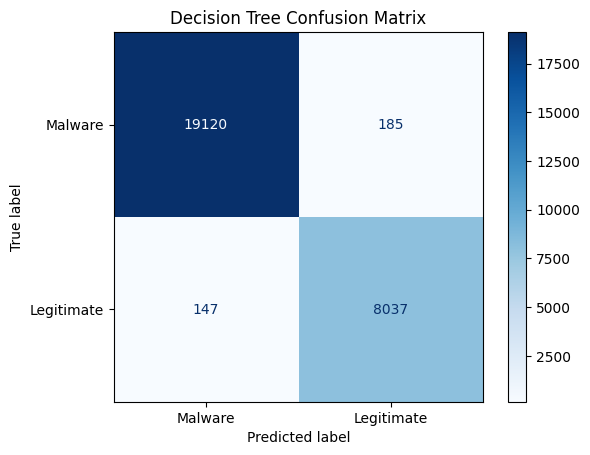

In [111]:
# Decision Tree Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_predictions)
print("\nDecision Tree Confusion Matrix:")
print(dt_cm)
ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=['Malware', 'Legitimate']).plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()


Random Forest Confusion Matrix:
[[19184   121]
 [  102  8082]]


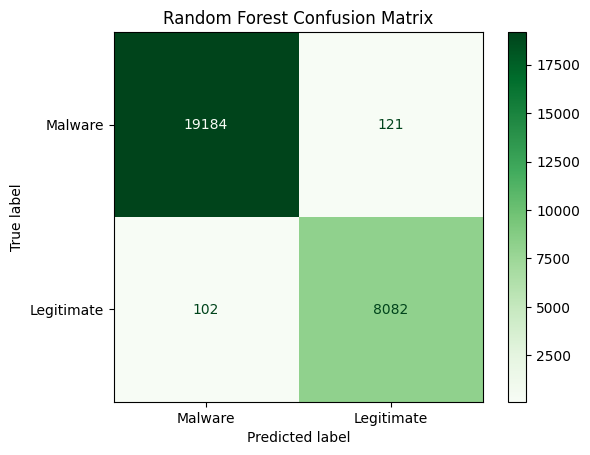

In [112]:
# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_predictions)
print("\nRandom Forest Confusion Matrix:")
print(rf_cm)
ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['Malware', 'Legitimate']).plot(cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()

# **Unsupervised Model**

In [113]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [114]:
# Step 1: Implement KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=2, random_state=42)

In [115]:
# Step 2: Get the predicted cluster labels
cluster_labels = kmeans.labels_

In [116]:
# Step 3: Compare with actual labels (y_train)
cm = confusion_matrix(y_train, cluster_labels)
if cm[0, 1] > cm[1, 0]:
    cluster_labels = 1 - cluster_labels  # Swap the cluster labels

In [117]:
# Step 4: Compute Adjusted Rand Index (ARI) for comparison
ari_score = adjusted_rand_score(y_train, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")

Adjusted Rand Index (ARI): 0.4770


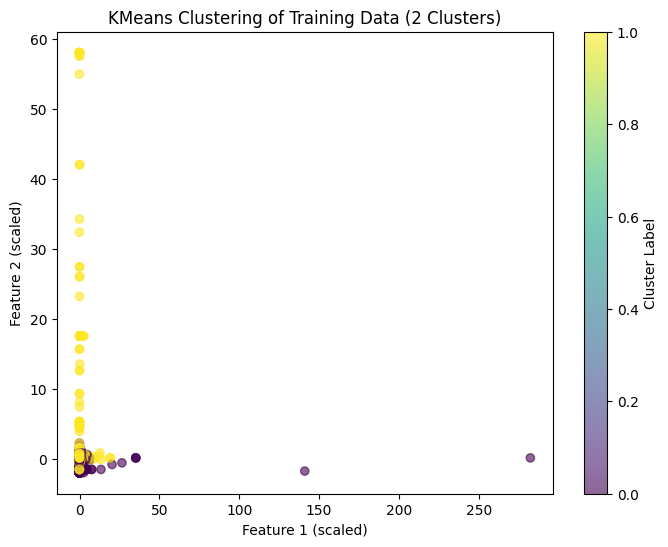

In [118]:
# Step 5: Visualize the clusters
plt.figure(figsize=(8, 6))

# Scatter plot of the first two features colored by predicted cluster labels
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.title("KMeans Clustering of Training Data (2 Clusters)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.colorbar(label='Cluster Label')
plt.show()

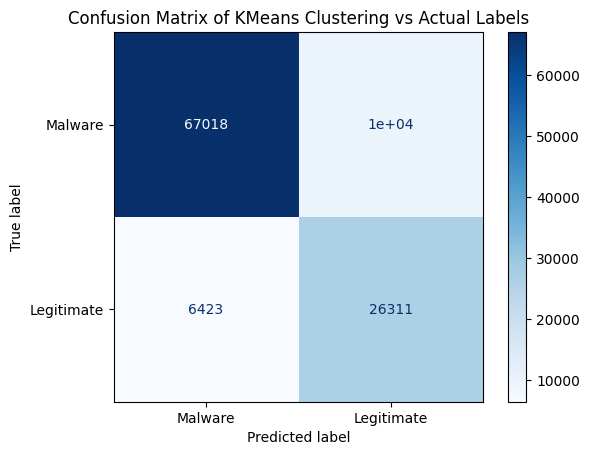

In [119]:
# Step 6: Confusion Matrix for Cluster Labels vs Actual Labels
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malware', 'Legitimate']).plot(cmap='Blues')
plt.title("Confusion Matrix of KMeans Clustering vs Actual Labels")
plt.show()

# **Deep Learning Model**

In [120]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import AUC
from tensorflow.keras.layers import Input

In [121]:
# 1. Create the model
model = Sequential()

In [122]:
# Input layer: Specify the input shape using Input layer
model.add(Input(shape=(X_train_scaled.shape[1],)))  # input shape is (number of features,)

In [123]:
# Hidden layer 1: Dense layer with 64 neurons, ReLU activation
model.add(Dense(64, activation='relu'))

In [124]:
# Hidden layer 2: Dense layer with 32 neurons, ReLU activation
model.add(Dense(32, activation='relu'))

In [125]:
# Output layer: 1 neuron, sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))

In [126]:
# Compile the model
model.compile(optimizer=Adam(),
              loss=BinaryCrossentropy(),
              metrics=[AUC()])  # AUC (Area Under Curve) for evaluation

In [127]:
# Train the model on the training data
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/20
3437/3437 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - auc_1: 0.9745 - loss: 0.1811 - val_auc_1: 0.9893 - val_loss: 0.1122
Epoch 2/20
3437/3437 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - auc_1: 0.9883 - loss: 0.1230 - val_auc_1: 0.9898 - val_loss: 0.1098
Epoch 3/20
3437/3437 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - auc_1: 0.9900 - loss: 0.1168 - val_auc_1: 0.9914 - val_loss: 0.1025
Epoch 4/20
3437/3437 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - auc_1: 0.9912 - loss: 0.1084 - val_auc_1: 0.9923 - val_loss: 0.0984
Epoch 5/20
3437/3437 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - auc_1: 0.9918 - loss: 0.0997 - val_auc_1: 0.9933 - val_loss: 0.0905
Epoch 6/20
3437/3437 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - auc_1: 0.9933 - loss: 0.0942 - val_auc_1: 0.9935 - val_loss: 0.0873
Epoch 7/20
3437/3437 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - auc_1: 0.9933 - loss: 0.0897 - val_auc_1: 0.9936 - val_loss: 0.0871
Epoch 8/20
3437/3437 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - auc_1: 0.9935 - loss: 0.0896 - val_auc_1: 0.9943 - val_loss: 0.0876
Ep

In [128]:
# 4. Evaluate the model on the test set
test_loss, test_auc = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss:.4f}, Test AUC: {test_auc:.4f}")

860/860 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - auc_1: 0.9956 - loss: 0.0772
Test Loss: 0.0777, Test AUC: 0.9955


In [144]:
# 5. Plot the training and validation AUC
'''
import matplotlib.pyplot as plt

plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Model AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()
'''

"\nimport matplotlib.pyplot as plt\n\nplt.plot(history.history['auc'], label='Train AUC')\nplt.plot(history.history['val_auc'], label='Validation AUC')\nplt.title('Model AUC')\nplt.xlabel('Epochs')\nplt.ylabel('AUC')\nplt.legend()\nplt.show()\n"

# **Cross Validation**

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [132]:
# 1. Initialize the models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

In [133]:
# 2. Perform 5-fold cross-validation
# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(decision_tree, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Decision Tree Cross-Validation Scores: {dt_cv_scores}")
print(f"Decision Tree Average Accuracy: {dt_cv_scores.mean() * 100:.2f}%")
print(f"Decision Tree Standard Deviation: {dt_cv_scores.std():.4f}")

Decision Tree Cross-Validation Scores: [0.98685826 0.98776772 0.98635806 0.98508481 0.98667637]
Decision Tree Average Accuracy: 98.65%
Decision Tree Standard Deviation: 0.0009


In [134]:
# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(random_forest, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Random Forest Average Accuracy: {rf_cv_scores.mean() * 100:.2f}%")
print(f"Random Forest Standard Deviation: {rf_cv_scores.std():.4f}")

Random Forest Cross-Validation Scores: [0.99108726 0.99104179 0.98995043 0.98981401 0.99013233]
Random Forest Average Accuracy: 99.04%
Random Forest Standard Deviation: 0.0005


In [135]:
# 3. Compare the average scores
if rf_cv_scores.mean() > dt_cv_scores.mean():
    print("Random Forest generalizes better on this dataset.")
else:
    print("Decision Tree generalizes better on this dataset.")

Random Forest generalizes better on this dataset.


# **Model Evaluation**

In [136]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [137]:
# 1. Train the Decision Tree and Random Forest models on the entire training set
decision_tree.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [138]:
# 2. Make predictions on the test set
dt_predictions = decision_tree.predict(X_test_scaled)
rf_predictions = random_forest.predict(X_test_scaled)

In [139]:
# 3. Evaluate Decision Tree
print("Decision Tree Evaluation:")
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
dt_class_report = classification_report(y_test, dt_predictions)

print(f"Accuracy: {dt_accuracy * 100:.2f}%")
print(f"Confusion Matrix:\n{dt_conf_matrix}")
print(f"Classification Report:\n{dt_class_report}")

Decision Tree Evaluation:
Accuracy: 98.79%
Confusion Matrix:
[[19120   185]
 [  147  8037]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19305
           1       0.98      0.98      0.98      8184

    accuracy                           0.99     27489
   macro avg       0.98      0.99      0.99     27489
weighted avg       0.99      0.99      0.99     27489



In [140]:
# 4. Evaluate Random Forest
print("\nRandom Forest Evaluation:")
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

print(f"Accuracy: {rf_accuracy * 100:.2f}%")
print(f"Confusion Matrix:\n{rf_conf_matrix}")
print(f"Classification Report:\n{rf_class_report}")


Random Forest Evaluation:
Accuracy: 99.19%
Confusion Matrix:
[[19184   121]
 [  102  8082]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19305
           1       0.99      0.99      0.99      8184

    accuracy                           0.99     27489
   macro avg       0.99      0.99      0.99     27489
weighted avg       0.99      0.99      0.99     27489



In [141]:
# 5. Evaluate KMeans clustering model
from sklearn.metrics import adjusted_rand_score

kmeans_predictions = kmeans.predict(X_test_scaled)
kmeans_adjusted_rand = adjusted_rand_score(y_test, kmeans_predictions)

print("\nKMeans Clustering Evaluation:")
print(f"Adjusted Rand Index (ARI): {kmeans_adjusted_rand * 100:.2f}%")


KMeans Clustering Evaluation:
Adjusted Rand Index (ARI): 48.11%
